In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("/content/HR_comma_sep.csv")
data.head()
print(data.shape)

(14999, 10)


In [ ]:
#columns
print(data.columns)
print(data.describe)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

In [ ]:
print(data.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


In [ ]:
#left employee
left_employee=data[data['left']==0]
left_employee.shape
left_employee['left'].count()   # no of persons who left the company

11428

In [ ]:
#retained Employee
retianed_employees=data[data['left']==1]
retianed_employees['left'].count()        # no of persons who left the company

3571

# Variables that influence the employee retention

In [ ]:
data1=data.iloc[:,0:8]
data1.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [ ]:
data1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#Observation
->Satisfaction_level: The satisfaction level of employee left the company was low than who stayed in the company.

->Average_monthly_hours: The working hours were also high when compared to person who stayed in the company

Promotion_last_5years-The promotion were also less.
so these are the factors that affecting the retension in the company


In [ ]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
#subsetting the data
data3=data[['left','salary']]
data3.head()

,left,salary
0,1,low
1,1,medium
2,1,medium
3,1,low
4,1,low


Text(0.5, 1.0, 'Salary on employee Retention')

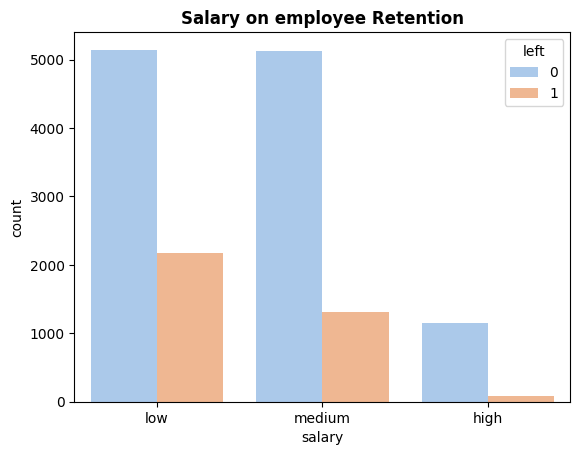

In [ ]:
sns.color_palette("pastel")
sns.countplot(data=data3,x='salary',hue = "left",palette='pastel')
plt.title('Salary on employee Retention',fontweight='bold')
#sns.histplot(data=data3,x='salary',hue = "left",multiple="dodge", shrink=.8)



# Observation
In this, we can see that person with high salary are less likely to leave the company.
People with low and medium salaries are more likely to leave the company

<Axes: title={'center': 'Department Based retention '}, xlabel='Department', ylabel='Count'>

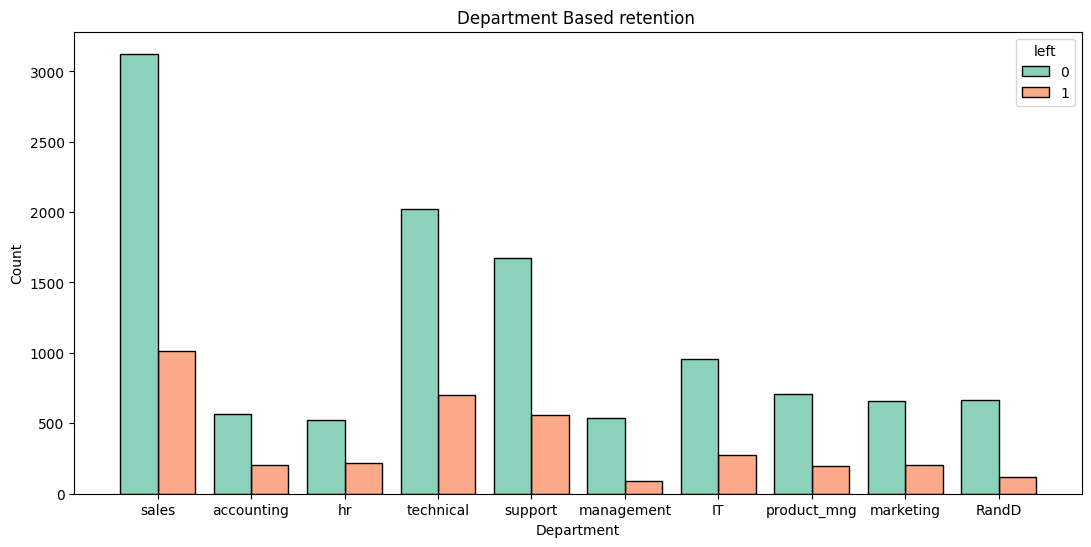

In [ ]:
sns.color_palette("Set2")
plt.figure(figsize=(13, 6))
plt.title('Department Based retention ',fontweight='bold')
sns.histplot(data=data,x='Department',hue = "left",multiple="dodge", shrink=.8,palette="Set2")

The highest Number of people who left the company are from the sales department Followed by technical.

<Axes: title={'center': 'Deparment Based Salary'}, xlabel='Department', ylabel='Count'>

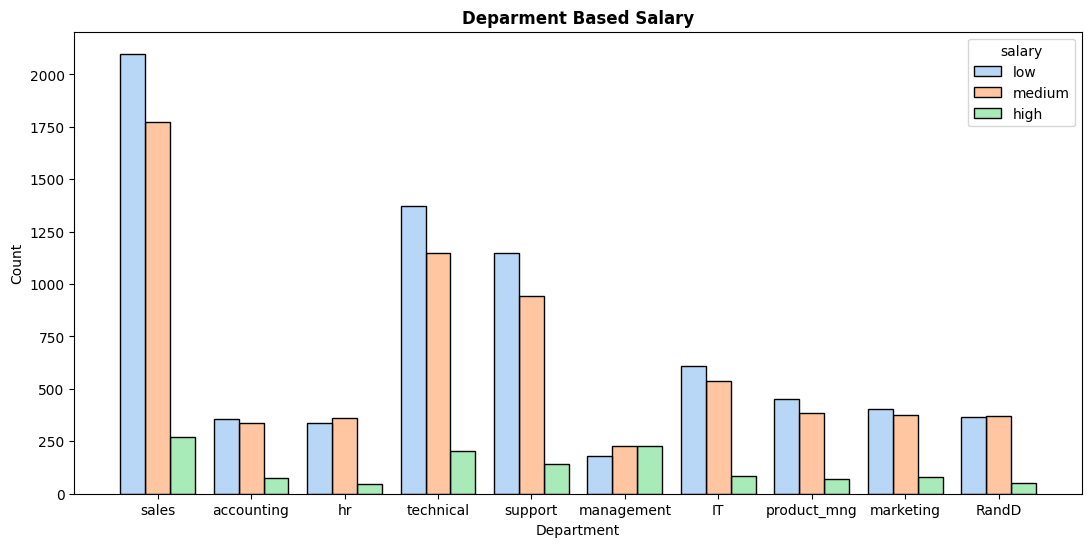

In [ ]:
sns.color_palette("pastel")
plt.figure(figsize=(13, 6))
plt.title('Deparment Based Salary',fontweight='bold')
sns.histplot(data=data,x='Department',hue = "salary",multiple="dodge", shrink=.8,palette="pastel")

# Observation
The number of people who was paid lowest are from the sales department.

<Axes: title={'center': 'Salary on employee Retention'}, xlabel='Department', ylabel='count'>

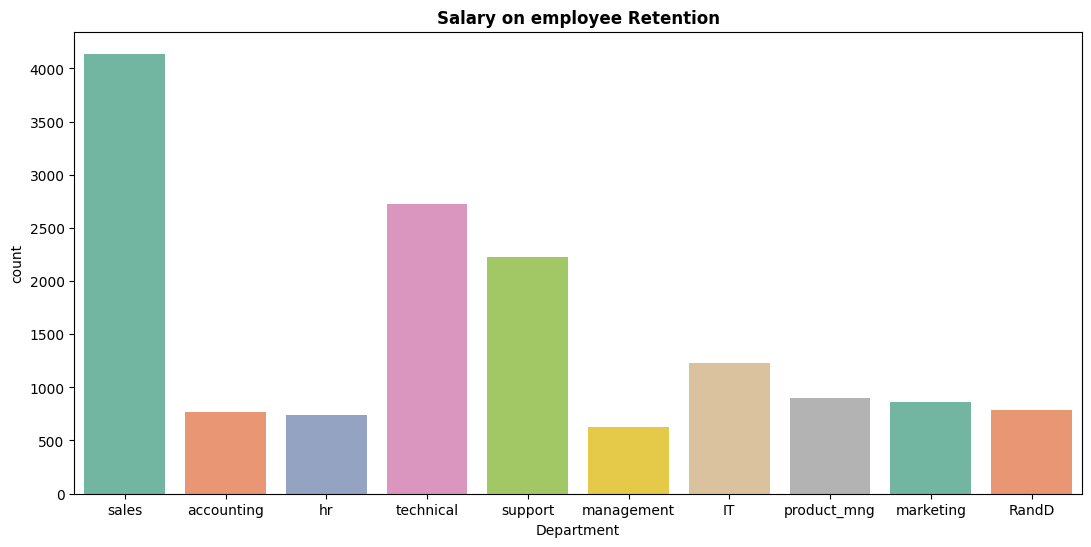

In [ ]:
sns.color_palette("Set2")
plt.figure(figsize=(13, 6))
plt.title('Salary on employee Retention',fontweight='bold')
sns.countplot(data=data,x='Department',hue='Department',palette='Set2')


#Observation
More number of people are working the sales department when compared to other departments.

# One Hot encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
data['salary']=le.fit_transform(data.salary)
print(data.head())
x=data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']].values

x1=data[['satisfaction_level','average_montly_hours','promotion_last_5years']].values
y=data['left']



   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0       1  
1       2  
2 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
categorical_feature=[3]
trans=ohe.fit_transform(x[:,categorical_feature]).toarray()
print(trans)
r=np.hstack((trans,x1))
#print(r)
x=r[:,1:]
print(x)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[1.00e+00 0.00e+00 3.80e-01 1.57e+02 0.00e+00]
 [0.00e+00 1.00e+00 8.00e-01 2.62e+02 0.00e+00]
 [0.00e+00 1.00e+00 1.10e-01 2.72e+02 0.00e+00]
 ...
 [1.00e+00 0.00e+00 3.70e-01 1.43e+02 0.00e+00]
 [1.00e+00 0.00e+00 1.10e-01 2.80e+02 0.00e+00]
 [1.00e+00 0.00e+00 3.70e-01 1.58e+02 0.00e+00]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print(len(x_train))
print(len(y_train))

13499
13499


# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr.predict(x_test)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(y_test)

12956    0
9018     0
3811     0
5271     0
10776    0
        ..
11716    0
10282    0
9753     0
13334    0
2940     0
Name: left, Length: 1500, dtype: int64


#Model_score

In [ ]:
lr.score(x_train,y_train)

0.7772427587228684

# Saving the model

In [ ]:
import pickle

In [ ]:
with open("logistic_model.pickel","wb") as f:
  pickle.dump(lr,f)
with open("logistic_model.pickel","rb") as f:
  md=pickle.load(f)



In [ ]:
md.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])